In this notebook I want to present the classification problem with KNN. So here I import the data and work with it with the KNN. 

In [12]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
data = load_iris()

In [31]:
flowers = data.target_names

In [8]:
df_iris_data = pd.DataFrame(data.data)
df_iris_target = pd.DataFrame(data.target)

In [10]:
df_iris_data = pd.DataFrame(data.data)
df_iris_target = pd.DataFrame(data.target)

df_iris_data = df_iris_data.rename(columns={0:'sepal length (cm)', 1:'sepal width (cm)', 2:'petal length (cm)',
                                            3:'petal width (c)'})

df_iris_target = df_iris_target.rename(columns={0:"Target"})

df_data = pd.concat([df_iris_data, df_iris_target],axis=1)

print('\nHere is the dataframe of the dataset:\n')
df_data


Here is the dataframe of the dataset:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (c),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


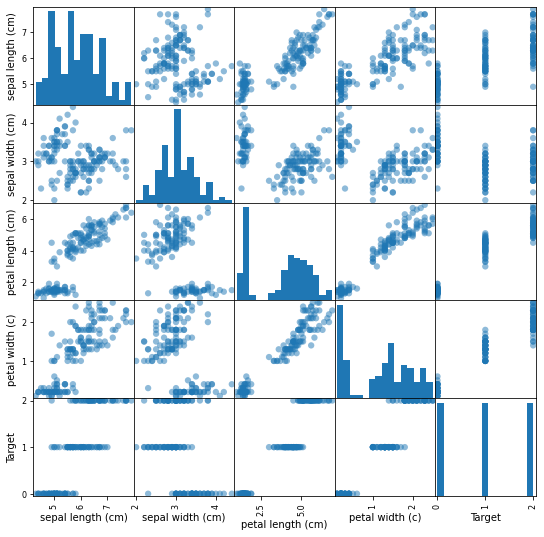

In [15]:
from matplotlib import cm
from pandas.plotting import scatter_matrix

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(df_data, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

Train & Test splitting the data and make it ready for KNN:

In [22]:
X = df_iris_data.values
y = df_iris_target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Specify the KNN parameters and fitting

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

Check the accuracy of the fit:

In [25]:
knn.score(X_test, y_test)

0.9736842105263158

The score is great! let's do some predicitons:

In [51]:
prediction = knn.predict([[5,3,2,1]])
print('The predicted flower is: ', flowers[prediction[0]])

The predicted flower is:  setosa


Let's do another prediction:

In [35]:
prediction = knn.predict([[4,1,2,1]])
print('The predicted flower is: ', flowers[prediction[0]])

The predicted flower is:  versicolor


Let's double check the effect of number of neighbours on accuracy score:

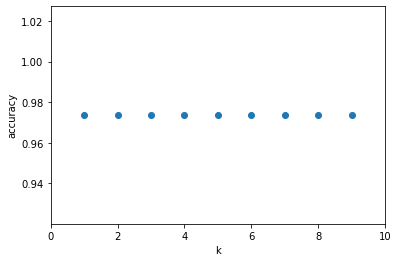

In [46]:
k_range = range(1,10)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train.ravel())
    scores.append(knn.score(X_test, y_test.ravel()))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,2,4,6,8,10]);

Alright, it looks by increasing the numer of neighbours the accuracy stays the same. What about the train test split portion?

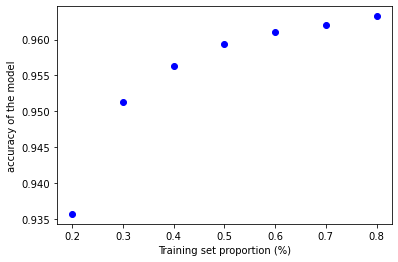

In [50]:
t = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train.ravel())
        scores.append(knn.score(X_test, y_test.ravel()))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy of the model');

Apparently by increasing the portion of train set the accuracy is also increasing, possibly if the test set is 20% of the data then accuracy is better.  